`We Will Analysis our Dataset to understand much better`

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

In [2]:
df = pd.read_csv('../Dataset/India.csv')
print(df.shape)
df.head(n=5)

(348, 37)


,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,...,positive_rate,tests_per_case,tests_units,total_vaccinations,new_vaccinations,total_vaccinations_per_hundred,new_vaccinations_per_million,median_age,aged_65_older,aged_70_older
0,2020-01-30,1.0,1.0,NaN,NaN,NaN,NaN,0.001,0.001,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.2,5.989,3.414
1,2020-01-31,1.0,0.0,NaN,NaN,NaN,NaN,0.001,0.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.2,5.989,3.414
2,2020-02-01,1.0,0.0,NaN,NaN,NaN,NaN,0.001,0.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.2,5.989,3.414
3,2020-02-02,2.0,1.0,NaN,NaN,NaN,NaN,0.001,0.001,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.2,5.989,3.414
4,2020-02-03,3.0,1.0,NaN,NaN,NaN,NaN,0.002,0.001,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.2,5.989,3.414


In [3]:
df['new_cases'] = df.new_cases.fillna(0.0)
df['total_deaths'] = df.total_cases.fillna(0.0)
df['new_deaths'] = df.new_deaths.fillna(0.0)

df.head()

,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,...,positive_rate,tests_per_case,tests_units,total_vaccinations,new_vaccinations,total_vaccinations_per_hundred,new_vaccinations_per_million,median_age,aged_65_older,aged_70_older
0,2020-01-30,1.0,1.0,NaN,1.0,0.0,NaN,0.001,0.001,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.2,5.989,3.414
1,2020-01-31,1.0,0.0,NaN,1.0,0.0,NaN,0.001,0.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.2,5.989,3.414
2,2020-02-01,1.0,0.0,NaN,1.0,0.0,NaN,0.001,0.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.2,5.989,3.414
3,2020-02-02,2.0,1.0,NaN,2.0,0.0,NaN,0.001,0.001,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.2,5.989,3.414
4,2020-02-03,3.0,1.0,NaN,3.0,0.0,NaN,0.002,0.001,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.2,5.989,3.414


#### New Cases || New Deaths 

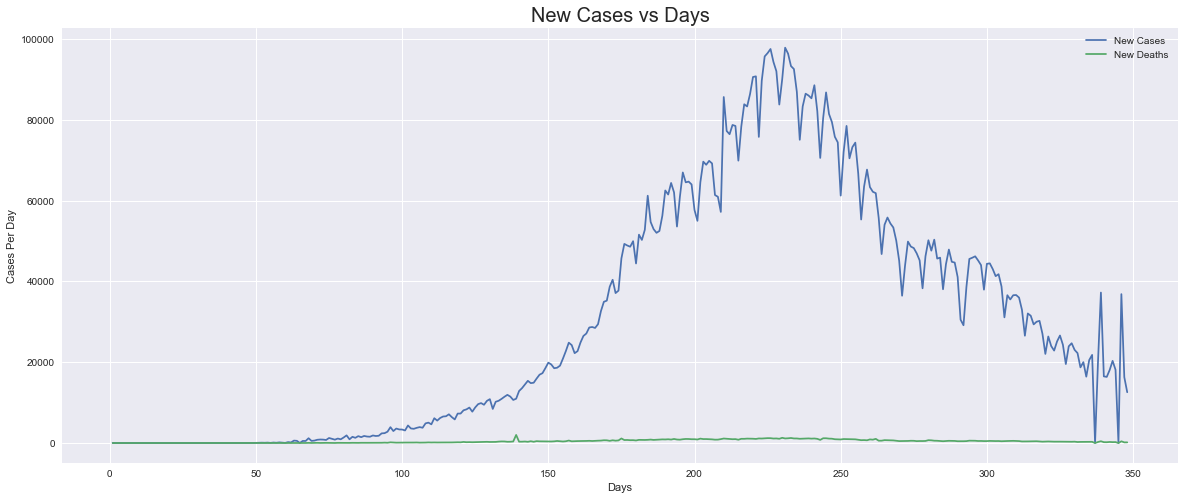

In [5]:
x = np.arange(1,df.shape[0]+1)

plt.rcParams['figure.figsize'] = (20,8)

plt.plot(x,list(df.new_cases), label='New Cases')
plt.plot(x,list(df.new_deaths), label='New Deaths')
plt.xlabel('Days')
plt.ylabel('Cases Per Day')
plt.title('New Cases vs Days', fontsize=20)
plt.legend()
plt.show()